<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


 -データセットの構造を理解します。

 -要約統計とデータの視覚化を実行します。

 -開発者のエクスペリエンス、ツール、仕事の満足度、その他の重要な変数の傾向を特定します。

### Install the required libraries


In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


 -データセットのロードから始めます。 JupyterLiteで作業する場合は、PyFetchメソッドを使用できます。それ以外の場合は、Pandasのread_csv（）機能をローカルマシンまたはクラウド環境で直接使用できます。

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


 -列名、データ型、および要約情報を表示して、データ構造を理解します。

 -目的：データセットの形状と使用可能な変数に関する洞察を得る。

In [4]:
## Write your code here

print(df.columns)
print(df.describe())


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

### Step 3: Handle Missing Data


 -データセット内の欠損値を識別します。

 -データの完全性を確保するために、必要に応じて欠損値を削除または削除します。



In [5]:
## Write your code here

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Calculate percentage of missing values
print("\nPercentage of missing values:")
print((df.isnull().sum() / len(df)) * 100)

# Handle missing values (example: fill with mode for categorical columns)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Handle missing values for numerical columns (example: fill with median)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

# Verify no missing values remain
print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values in each column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

Percentage of missing values:
ResponseId              0.000000
MainBranch              0.000000
Age                     0.000000
Employment              0.000000
RemoteWork             16.246160
                         ...    
JobSatPoints_11        55.002522
SurveyLength           14.143375
SurveyEase             14.057796
ConvertedCompYearly    64.186928
JobSat                 55.490013
Length: 114, dtype: float64

Missing values after handling:
ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11     

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



 -「雇用」、「Jovesat」（仕事の満足度）、「Yearcodepro」（プロのコーディングエクスペリエンス）などの重要な列を調べます。

 - **命令**：各列の値を計算して、応答の分布を理解します。

In [6]:
## Write your code here

# Analyze Employment column
print("Employment distribution:")
print(df['Employment'].value_counts())

# Analyze JobSat column
print("\nJob Satisfaction distribution:")
print(df['JobSat'].value_counts())

# Analyze YearsCodePro column
print("\nYears of Professional Coding Experience distribution:")
print(df['YearsCodePro'].value_counts())

Employment distribution:
Employment
Employed, full-time                                                                                                                                  39041
Independent contractor, freelancer, or self-employed                                                                                                  4846
Student, full-time                                                                                                                                    4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                              3557
Not employed, but looking for work                                                                                                                    2341
                                                                                                                                                     ...  
Employed, full-time;Student, full-

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


-PieチャートまたはKDEプロットを作成して、「Jovesat」の分布を視覚化します。

 -プロットの解釈を提供し、仕事の満足度の重要な傾向を強調します。

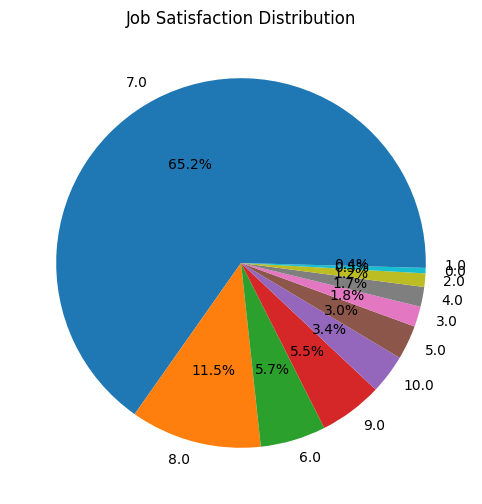

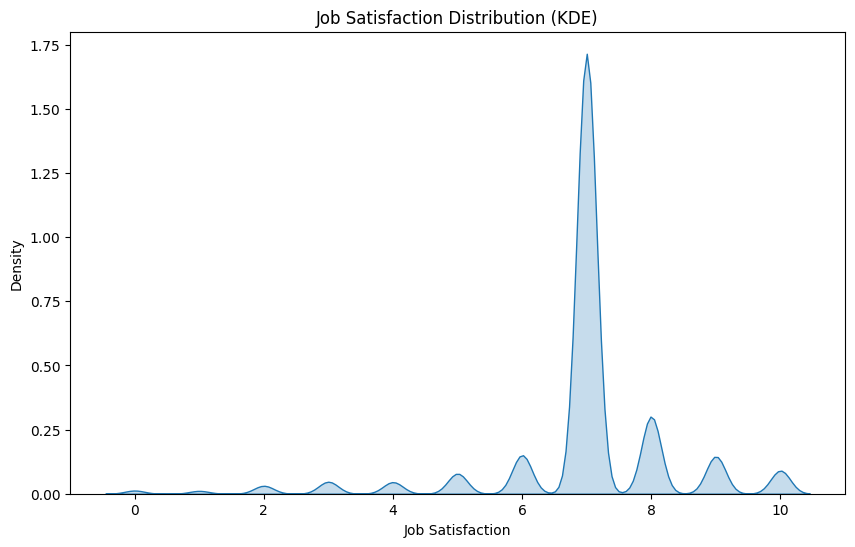

In [8]:
## Write your code here

# Create a pie chart for JobSat
plt.figure(figsize=(10, 6))
df['JobSat'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Job Satisfaction Distribution')
plt.ylabel('')
plt.show()

# Create a KDE plot for JobSat
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='JobSat', fill=True)
plt.title('Job Satisfaction Distribution (KDE)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Density')
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences} using a Venn diagram or a grouped bar chart.


 -「LanguageHaveWorked」のプログラミング言語の頻度を比較し、「言語wanttoworkwith」と比較します。
  
 -ベン図またはグループ化されたバーチャートを使用して、オーバーラップまたは違いを視覚化します。

/var/folders/np/lj2crsq11vl__dd5tfxv027m0000gn/T/ipykernel_4013/677139229.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


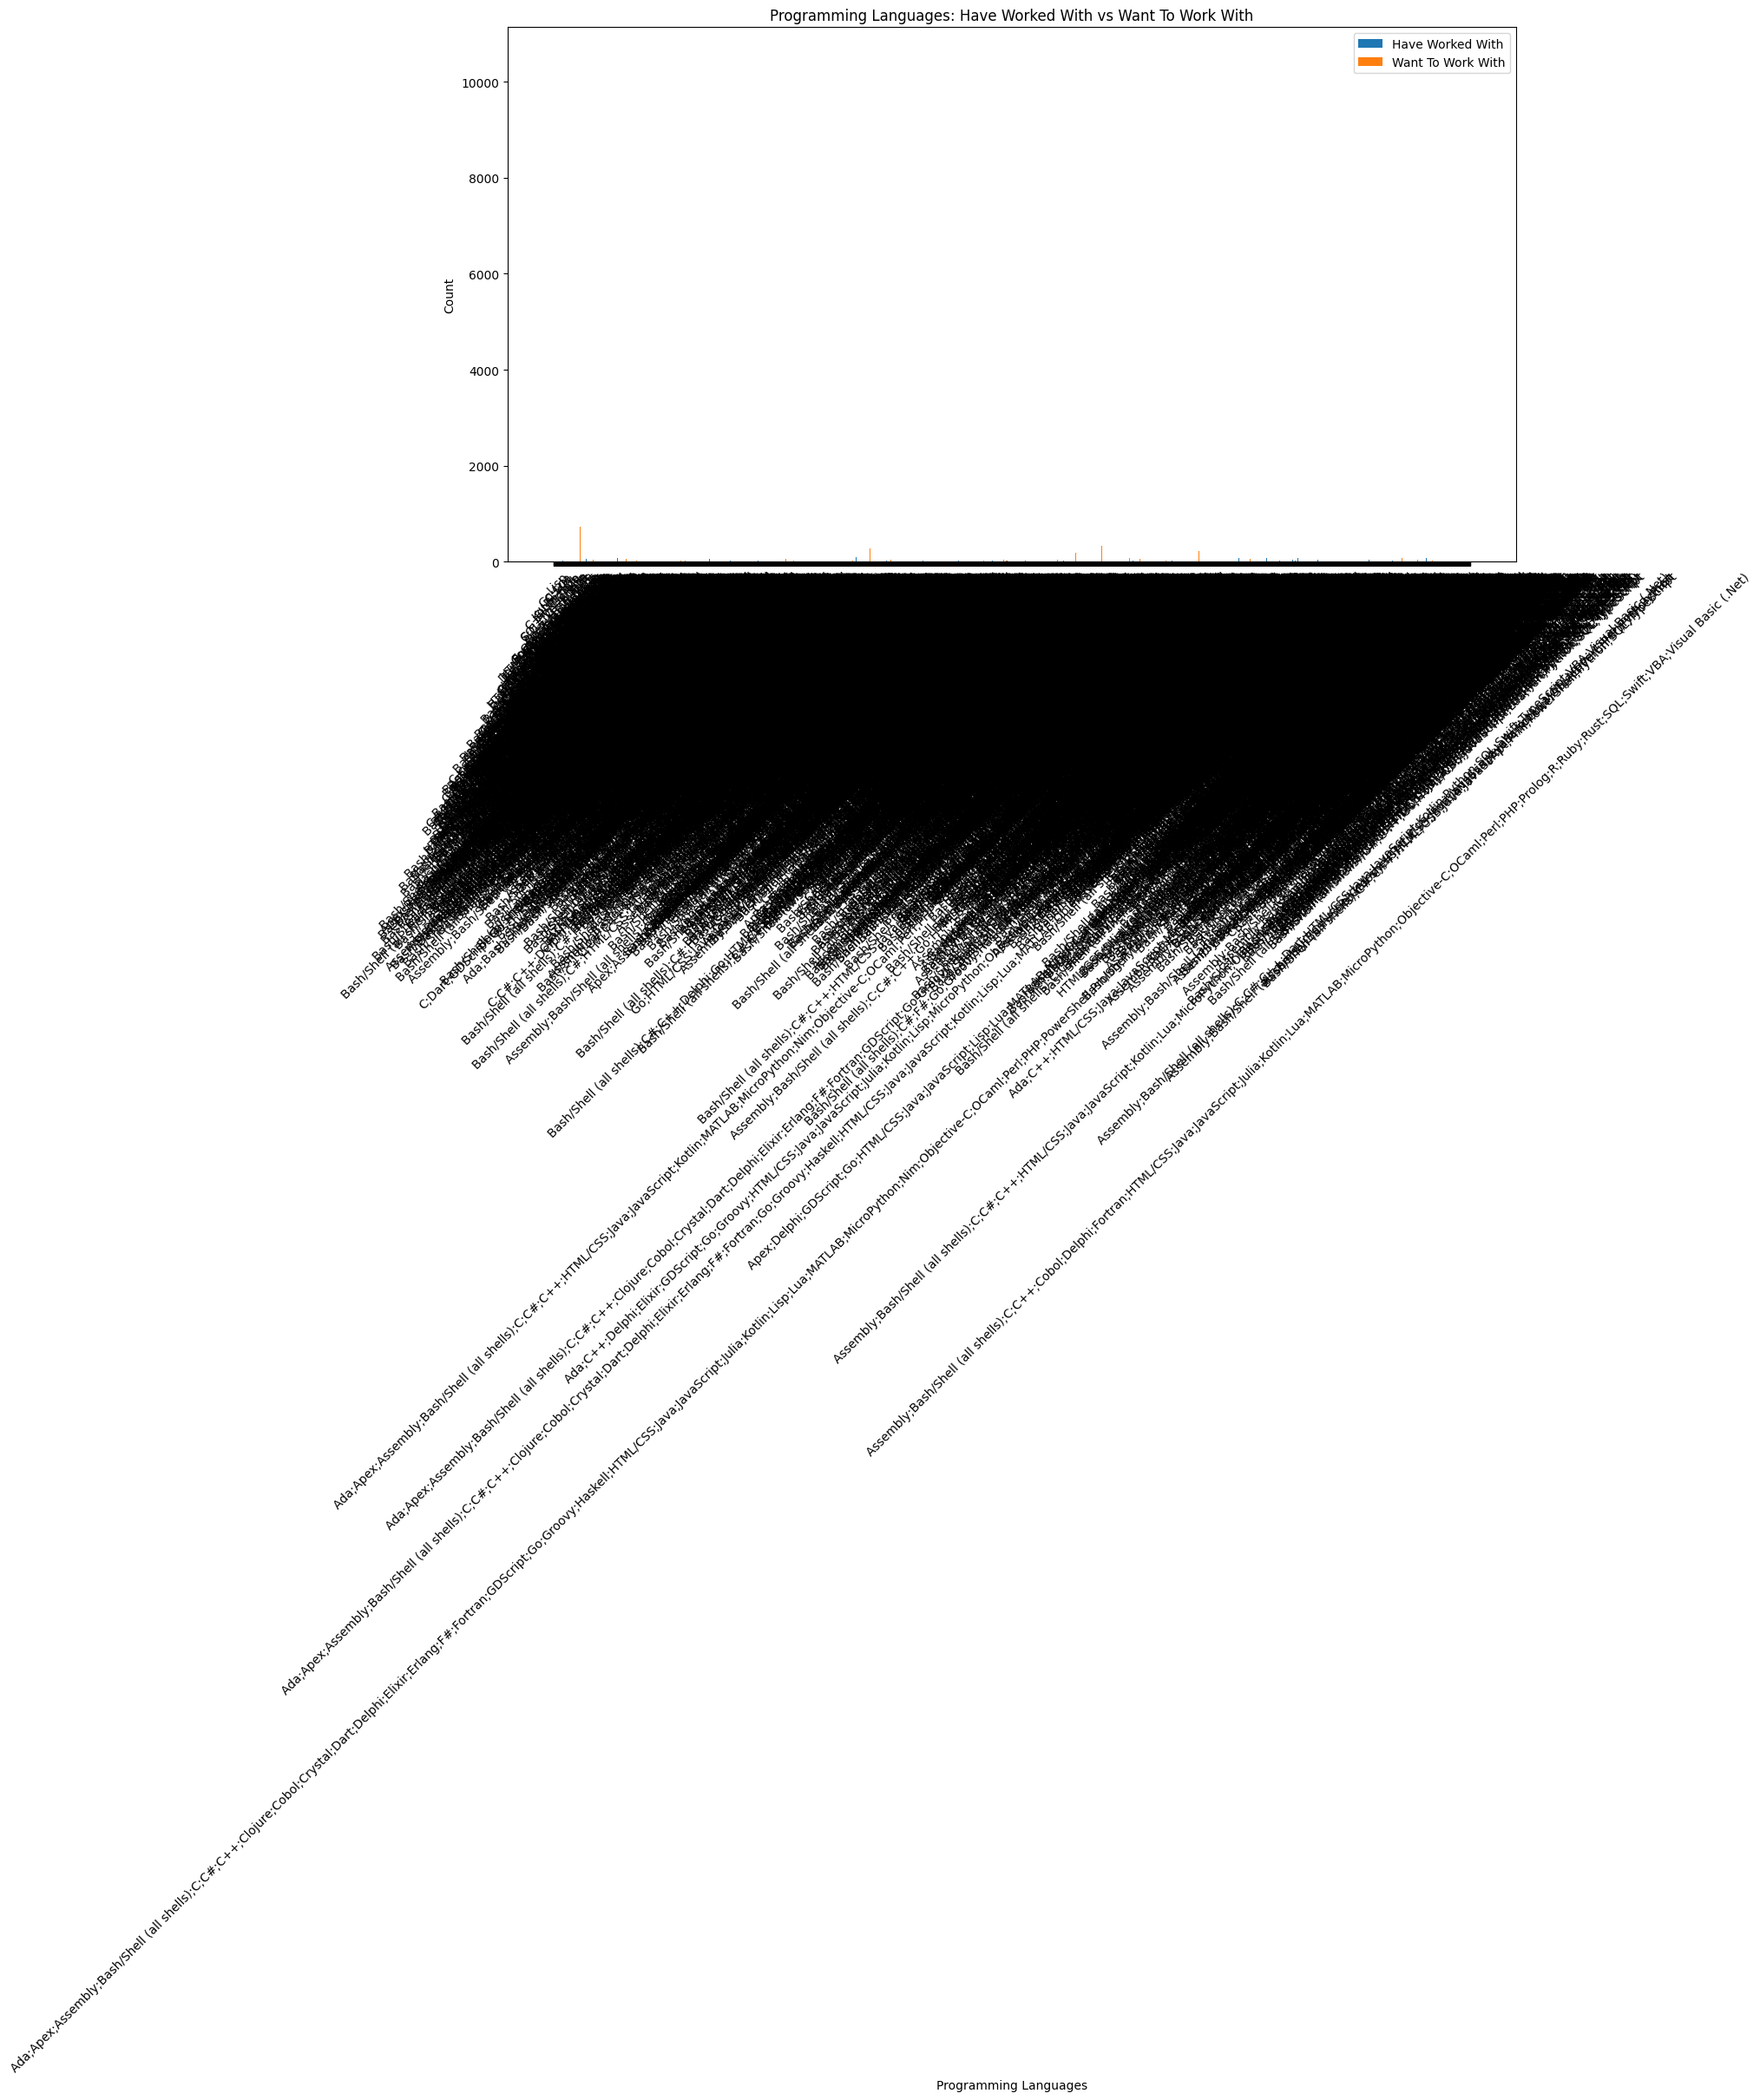

In [12]:
## Write your code here

# Step 6: Programming Languages Analysis
# 修正版
# まず、各言語の出現回数をカウント
languages_worked = df['LanguageHaveWorkedWith'].str.split(',').explode().value_counts()
languages_want = df['LanguageWantToWorkWith'].str.split(',').explode().value_counts()

# 両方のデータフレームで共通の言語を取得
common_languages = list(set(languages_worked.index) & set(languages_want.index))

# 共通の言語のみを使用して新しいデータフレームを作成
worked_counts = languages_worked[common_languages]
want_counts = languages_want[common_languages]

# データフレームを作成
data = pd.DataFrame({
    'Have Worked With': worked_counts,
    'Want To Work With': want_counts
})

# プロット
plt.figure(figsize=(15, 8))
x = range(len(common_languages))
width = 0.35

plt.bar(x, data['Have Worked With'], width, label='Have Worked With')
plt.bar([i + width for i in x], data['Want To Work With'], width, label='Want To Work With')

plt.xlabel('Programming Languages')
plt.ylabel('Count')
plt.title('Programming Languages: Have Worked With vs Want To Work With')
plt.xticks([i + width/2 for i in x], common_languages, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


 -グループ化されたバーチャートまたはヒートマップを使用して、地域ごとのリモートワークの分布を視覚化します。

Available columns in the dataset:
['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',

/var/folders/np/lj2crsq11vl__dd5tfxv027m0000gn/T/ipykernel_4013/3749152043.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


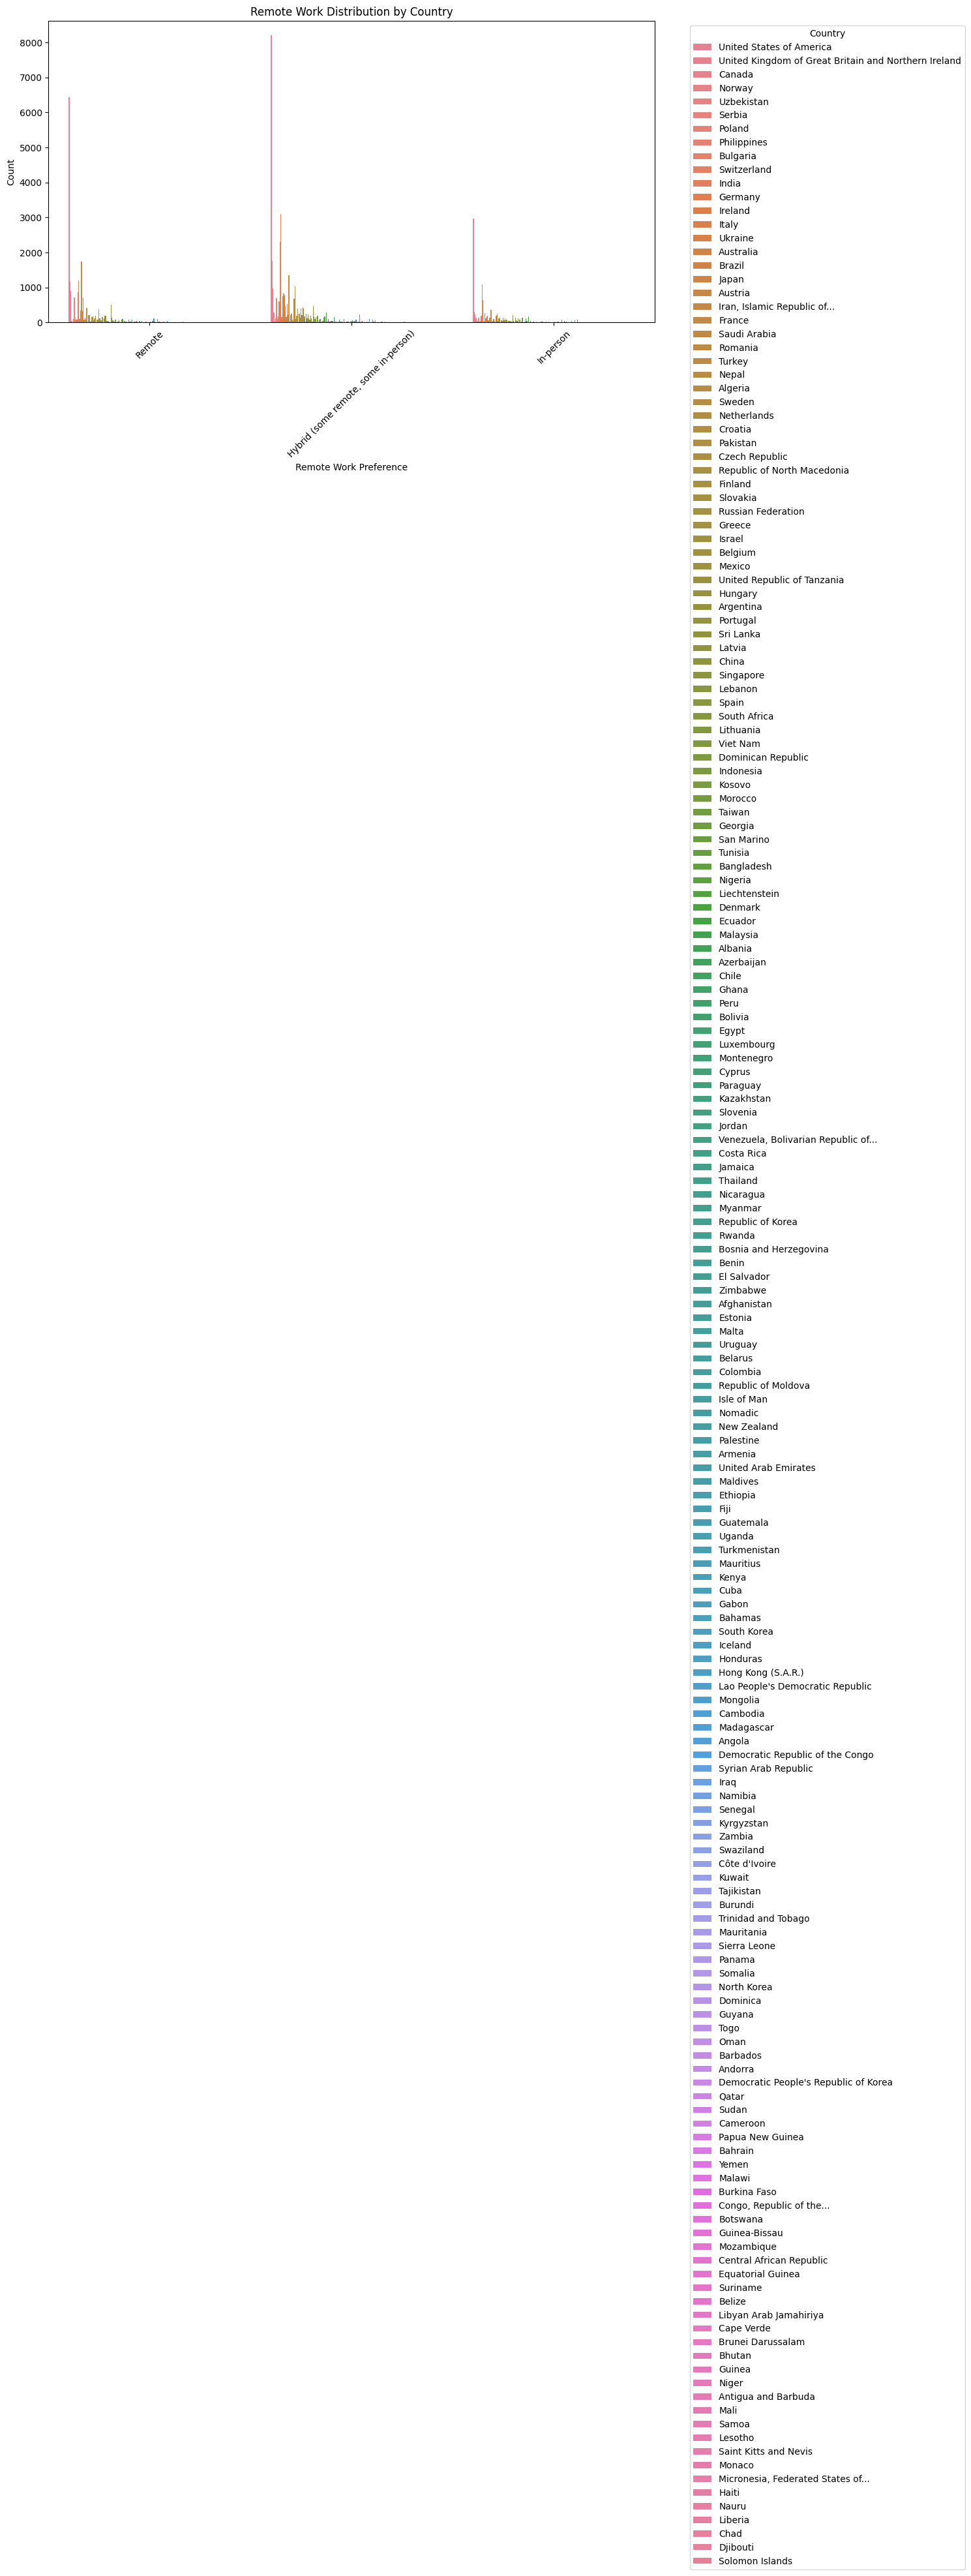

In [14]:
## Write your code here

# Create a grouped bar chart for RemoteWork by region
# Step 7: Analyze Remote Work Trends
# 修正版

# まず、データフレームの列名を確認
print("Available columns in the dataset:")
print(df.columns.tolist())

# 地域情報の列名を確認（例：'Country'や'Location'など）
# 適切な列名が見つかったら、それを使用してプロットを作成
plt.figure(figsize=(12, 6))

# 例として、'Country'列を使用する場合
try:
    sns.countplot(data=df, x='RemoteWork', hue='Country')
    plt.title('Remote Work Distribution by Country')
    plt.xlabel('Remote Work Preference')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
except KeyError:
    # 地域情報の列が見つからない場合は、RemoteWorkの分布のみを表示
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='RemoteWork')
    plt.title('Remote Work Distribution')
    plt.xlabel('Remote Work Preference')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


 -全体的な仕事の満足度（「Jovesat」）と「YearsCodepro」の相関関係を分析します。
  
 -ピアソンまたはスピアマン相関係数を計算します。

/var/folders/np/lj2crsq11vl__dd5tfxv027m0000gn/T/ipykernel_4013/3547668030.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['YearsCodePro_numeric'] = df['YearsCodePro'].apply(convert_years_to_numeric)


Correlation between Job Satisfaction and Years of Professional Coding: 0.07


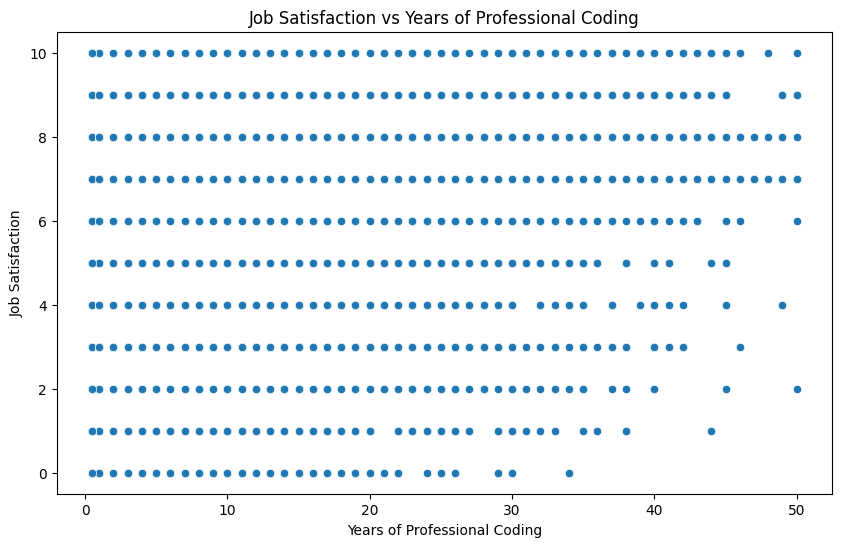

In [16]:
## Write your code here

# Step 8: Correlation between Job Satisfaction and Experience
# 修正版

# YearsCodePro列の値を数値に変換
def convert_years_to_numeric(x):
    if pd.isna(x):
        return None
    if x == 'Less than 1 year':
        return 0.5
    if x == 'More than 50 years':
        return 50
    try:
        return float(x)
    except:
        return None

# 数値に変換
df['YearsCodePro_numeric'] = df['YearsCodePro'].apply(convert_years_to_numeric)

# 欠損値を削除
df_clean = df.dropna(subset=['YearsCodePro_numeric', 'JobSat'])

# 相関を計算
correlation = df_clean['JobSat'].corr(df_clean['YearsCodePro_numeric'])
print(f"Correlation between Job Satisfaction and Years of Professional Coding: {correlation:.2f}")

# 散布図を作成
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='YearsCodePro_numeric', y='JobSat')
plt.title('Job Satisfaction vs Years of Professional Coding')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Job Satisfaction')
plt.show()

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


 -雇用状況（「雇用」）と教育レベル（「edlevel」）の関係を分析します。

 - **命令**： `pd.crosstab（）`を使用してクロスツェル組織を作成し、可能であれば積み重ねられたバープロットで視覚化します。

/var/folders/np/lj2crsq11vl__dd5tfxv027m0000gn/T/ipykernel_4013/3088665229.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

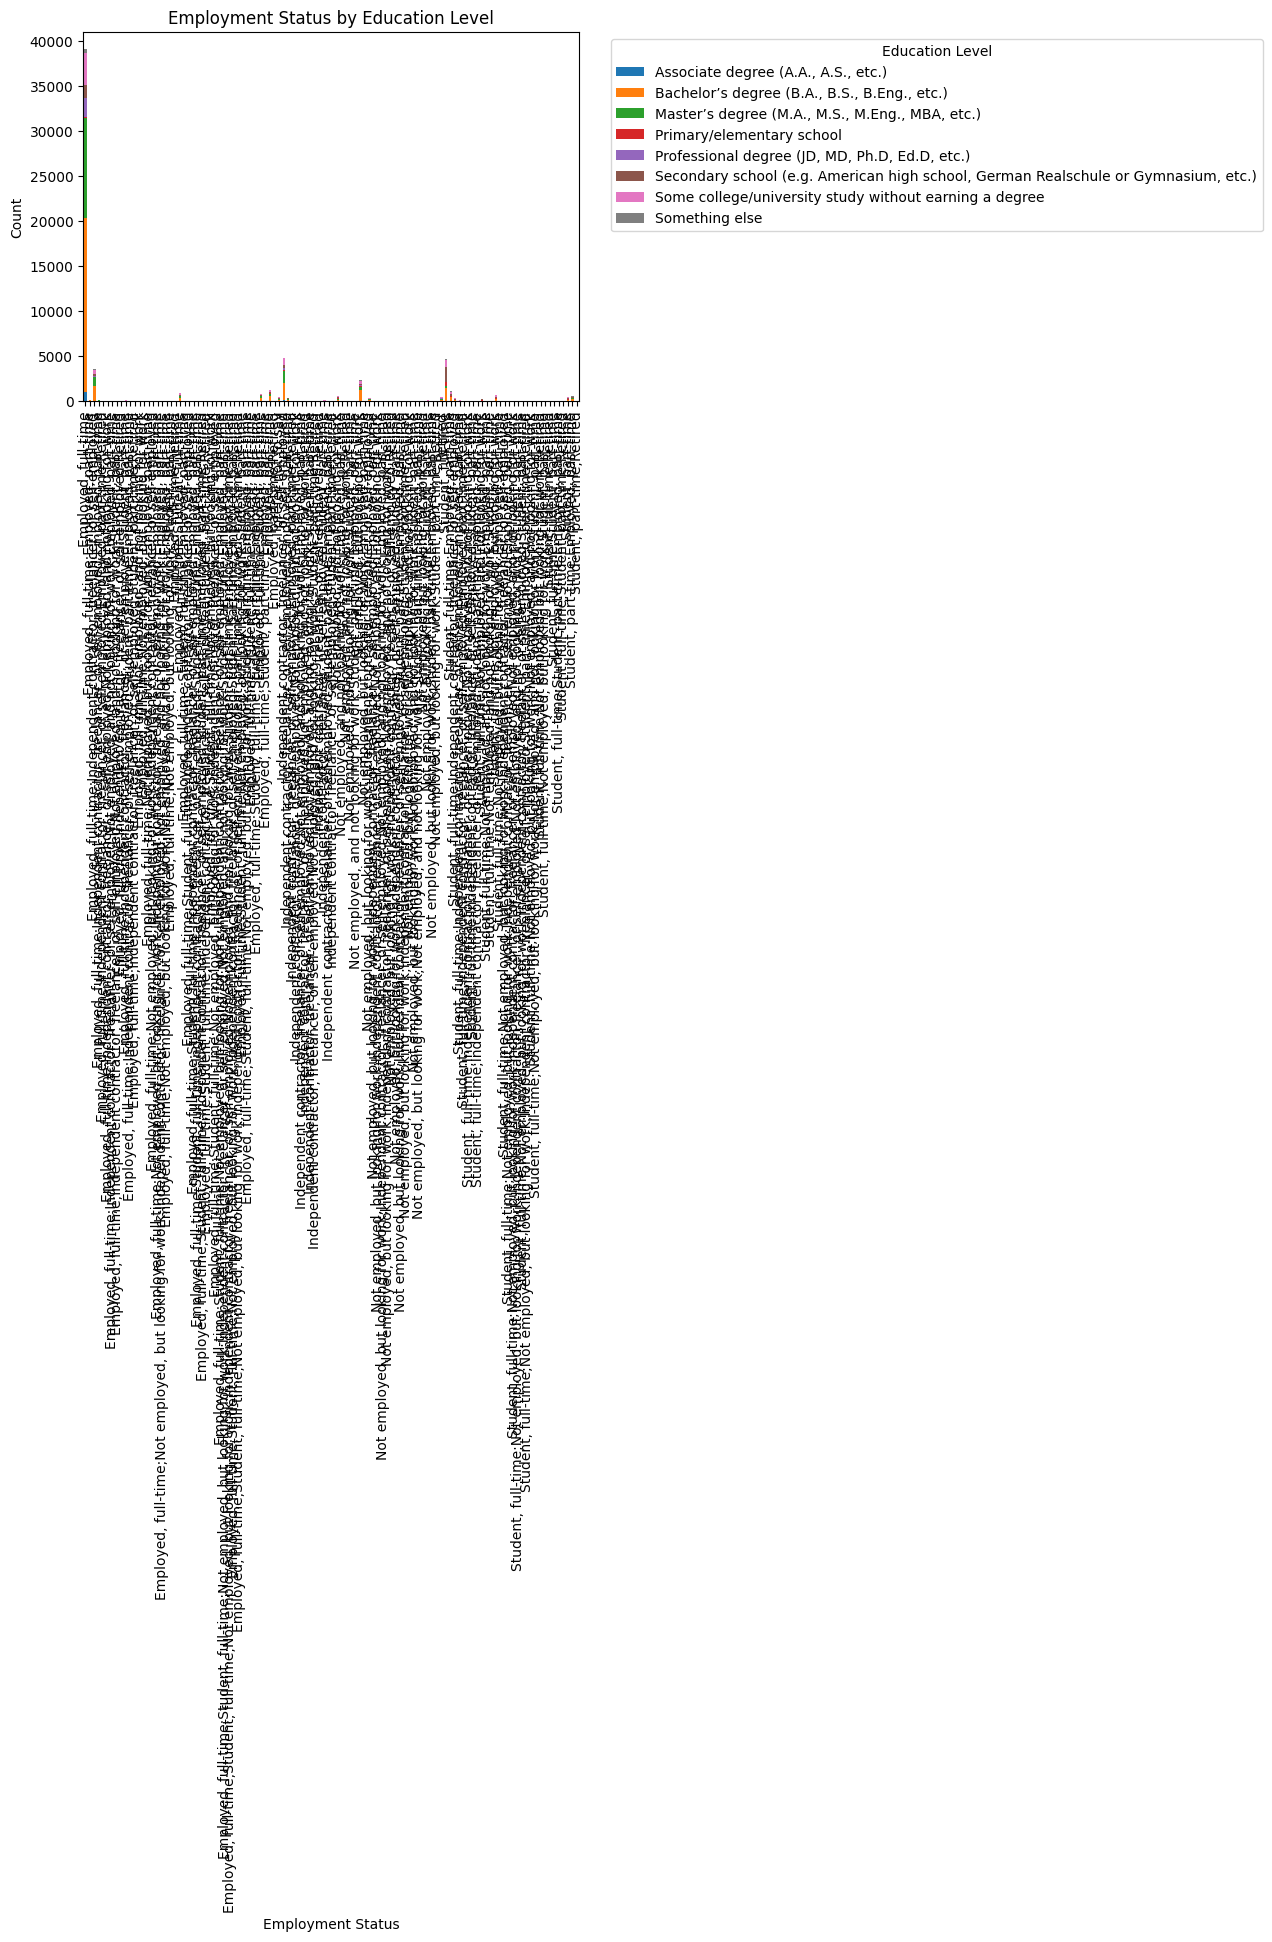

In [17]:
## Write your code here

# Create cross-tabulation
cross_tab = pd.crosstab(df['Employment'], df['EdLevel'])

# Create stacked bar plot
plt.figure(figsize=(12, 8))
cross_tab.plot(kind='bar', stacked=True)
plt.title('Employment Status by Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


 -クリーン化されたデータセットを新しいCSVファイルに保存して、さらに使用または共有します。

In [18]:
## Write your code here

# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_survey_data.csv', index=False)
print("Cleaned dataset has been saved to 'cleaned_survey_data.csv'")


Cleaned dataset has been saved to 'cleaned_survey_data.csv'


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
